# Modelo de predição de vendas de apartamentos em New York

In [126]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


## 1 - EDA (Anáslie exploratória de dados)

Vamos utilizar pandas e matplot

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

data_apartments = pd.read_csv('teste_indicium_precificacao.csv')


Durante a análise que realizer propus alguns colários, vamos justifica-los até o final:

- Os maiores preços estão em Manhattan;
- Exitem regiões mais caras devido a certas áreas específicas;
- Existem bairros que são mais caros que outros;
- O tipo de apartemetno que determina o espaço tem influência no preço;
- O nome contém uma característica do apartamento que tem influência no preço;

In [128]:
data_apartments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

In [129]:
print(data_apartments.isnull().sum())

id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64


*Obs:*
- O número de valores não nulos para anfitriões é menor que número total, o que indica anfitrião não declararam seus nomes
- O número de valores não nulos de moradias é menor que o número total, o que indica prédio sem nome

In [130]:
apartamentos_preco_zero = data_apartments[data_apartments['price'] == 0]
apartamentos_preco_zero

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
23160,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,2018-01-06,0.05,4,28
25432,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2019-06-24,2.56,4,127
25633,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Martial Loft,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,2019-05-18,0.71,5,0
25752,20608117,"Sunny, Quiet Room in Greenpoint",1641537,Lauren,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,2017-10-27,0.53,2,0
25777,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,2018-01-02,0.15,1,73
25793,20639628,Spacious comfortable master bedroom with nice ...,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,2019-06-15,4.28,6,176
25794,20639792,Contemporary bedroom in brownstone with nice view,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,2019-06-21,4.37,6,232
25795,20639914,Cozy yet spacious private brownstone bedroom,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,2019-06-23,4.35,6,222
26258,20933849,the best you can find,13709292,Qiuchi,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,3,0,NaN,NaN,1,0
26840,21291569,Coliving in Brooklyn! Modern design / Shared room,101970559,Sergii,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,2019-06-22,0.11,6,333


*Obs:*
- Exitem valores de preços com 0, pode indicar incoeerencia ou que o imóvel não está mais disponível para ser alugado, provavelmente por estar sendo alugado
- Um outro fator é contemplar o _working exchanging_, lugares que trocam serviço no estabelecimento pela estadia
- Os lugares que de fato estão indisponíveis são aqueles que a disponibilidade se encontra 0

In [131]:
apartamentos_sem_disponibilidade = data_apartments[data_apartments['disponibilidade_365']==0]
apartamentos_sem_disponibilidade.head(10)

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
13,6090,West Village Nest - Superhost,11975,Alina,Manhattan,West Village,40.73530,-74.00525,Entire home/apt,120,90,27,2018-10-31,0.22,1,0
19,7801,Sweet and Spacious Brooklyn Loft,21207,Chaya,Brooklyn,Williamsburg,40.71842,-73.95718,Entire home/apt,299,3,9,2011-12-28,0.07,1,0
25,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaN,NaN,1,0
47,13050,bright and stylish duplex,50846,Jennifer,Brooklyn,Bedford-Stuyvesant,40.68554,-73.94090,Entire home/apt,115,3,11,2017-01-01,0.10,1,0
65,16458,Light-filled 2B duplex in the heart of Park Sl...,64056,Sara,Brooklyn,Park Slope,40.67343,-73.98338,Entire home/apt,225,3,4,2017-09-24,0.16,1,0
87,20300,Great Location for NYC,76627,Pas,Manhattan,East Village,40.72912,-73.98057,Private room,50,1,2,2016-02-14,0.05,1,0
93,20913,Charming 1 bed GR8 WBurg LOCATION!,79402,Christiana,Brooklyn,Williamsburg,40.70984,-73.95775,Entire home/apt,100,5,168,2018-07-22,1.57,1,0


In [132]:
data_apartments.describe()

,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,4.889400e+04,4.889400e+04,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,38842.000000,48894.000000,48894.000000
mean,1.901753e+07,6.762139e+07,40.728951,-73.952169,152.720763,7.030085,23.274758,1.373251,7.144005,112.776169
std,1.098288e+07,7.861118e+07,0.054529,0.046157,240.156625,20.510741,44.550991,1.680453,32.952855,131.618692
min,2.595000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.472371e+06,7.822737e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967743e+07,3.079553e+07,40.723075,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915225e+07,1.074344e+08,40.763117,-73.936273,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'host_id'}>,
        <Axes: title={'center': 'latitude'}>],
       [<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'minimo_noites'}>],
       [<Axes: title={'center': 'numero_de_reviews'}>,
        <Axes: title={'center': 'reviews_por_mes'}>,
        <Axes: title={'center': 'calculado_host_listings_count'}>],
       [<Axes: title={'center': 'disponibilidade_365'}>, <Axes: >,
        <Axes: >]], dtype=object)

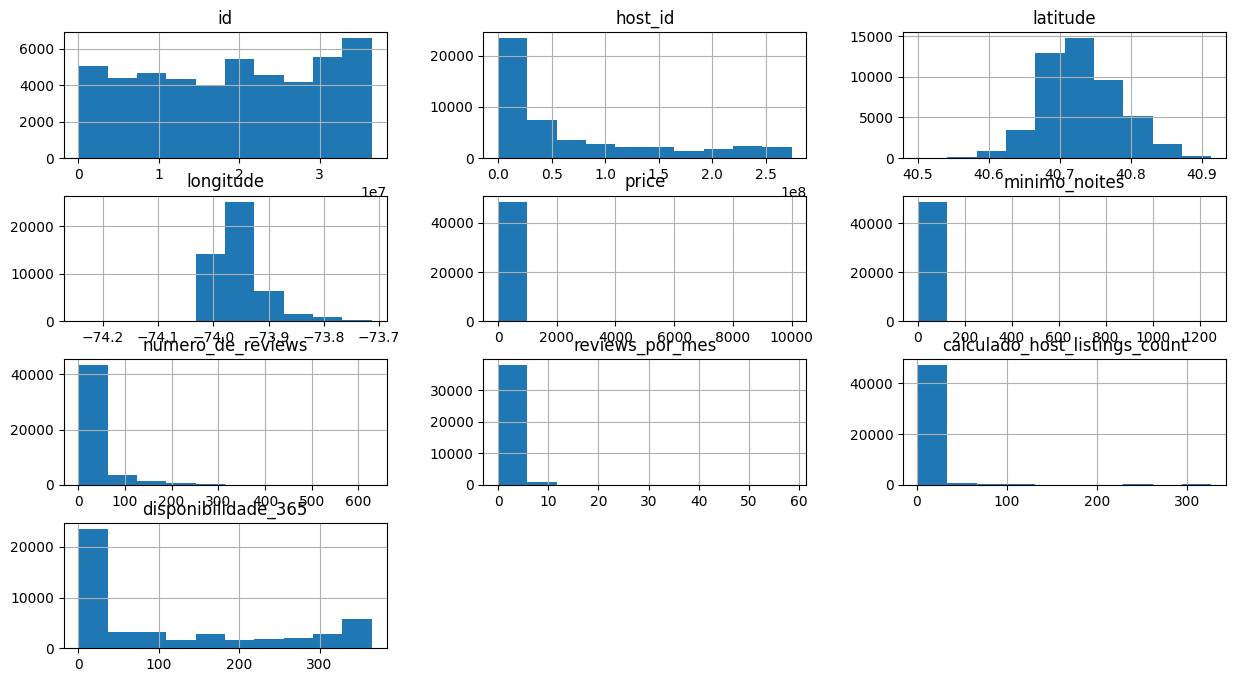

In [133]:
data_apartments.hist(figsize=(15,8))

Notamos que nossas variáveis estão *mal distribuidas* então para a análise de correlação necessiatamos de aplicar transformações nessas variáveis

<Axes: >

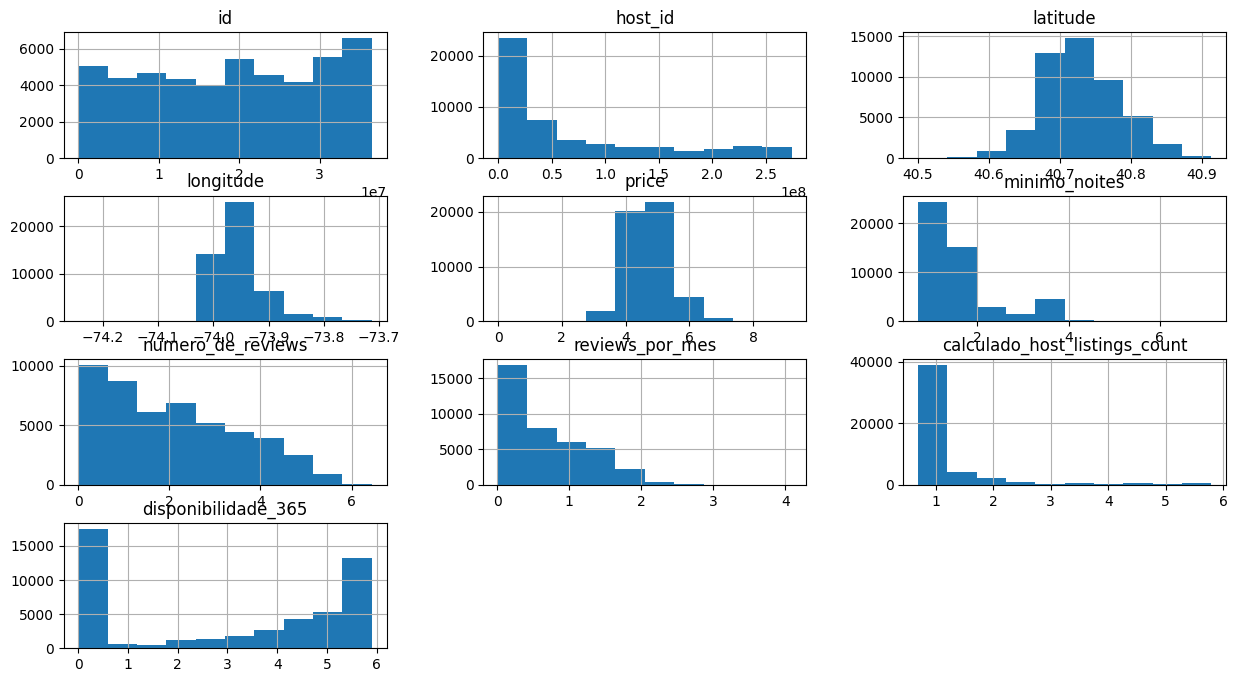

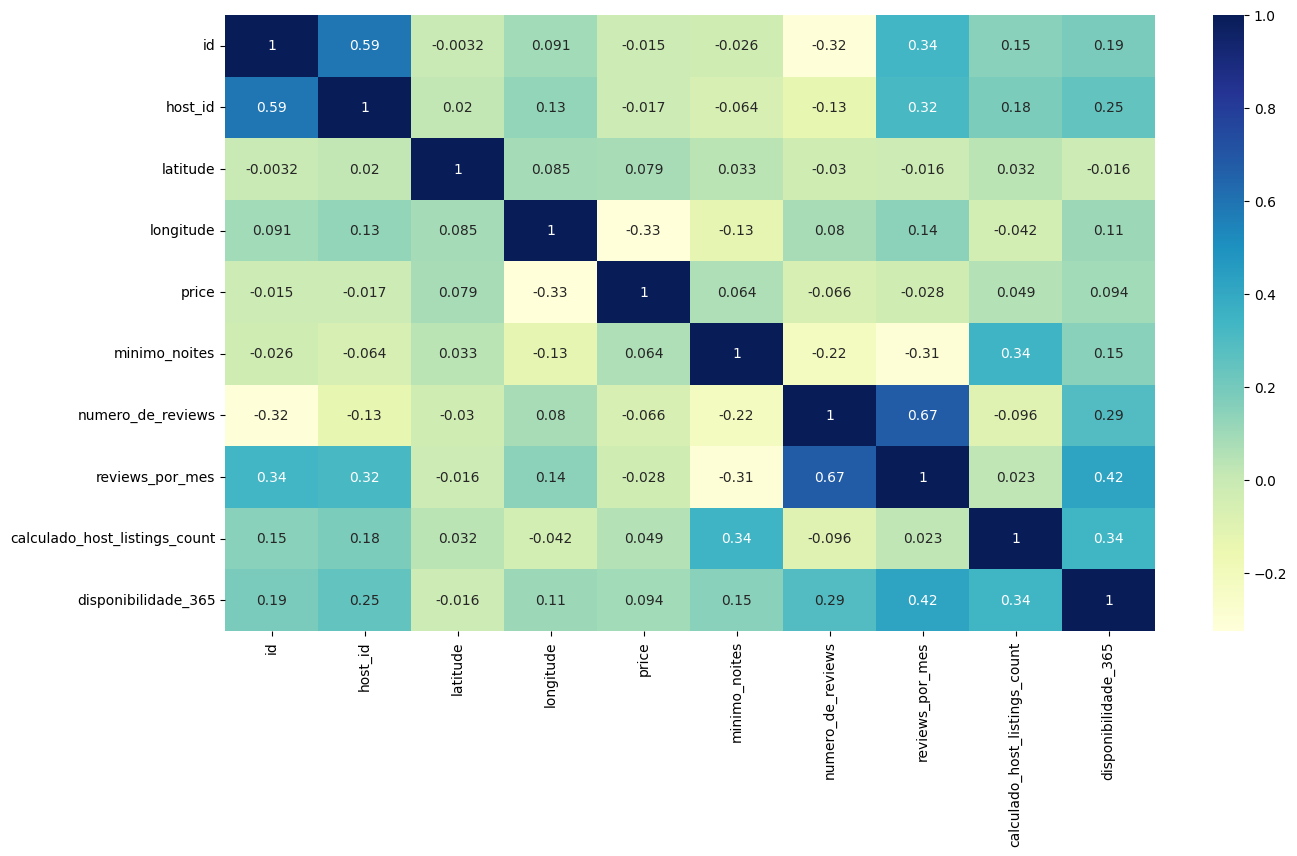

In [134]:
corr_matrix= data_apartments.drop(['nome','host_name','bairro','bairro_group','ultima_review','room_type'], axis=1)

corr_matrix['disponibilidade_365'] = (np.log(corr_matrix['disponibilidade_365']+1))
corr_matrix['calculado_host_listings_count'] = (np.log(corr_matrix['calculado_host_listings_count']+1))
corr_matrix['numero_de_reviews'] = (np.log(corr_matrix['numero_de_reviews']+1))
corr_matrix['reviews_por_mes'] = (np.log(corr_matrix['reviews_por_mes']+1))
corr_matrix['minimo_noites'] = (np.log(corr_matrix['minimo_noites']+1))
corr_matrix['price'] = (np.log(corr_matrix['price']+1))


corr_matrix.hist(figsize=(15,8))

plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix.corr(),annot=True,cmap='YlGnBu')

### Os maiores preços estão em Manhattan;

Vamos observar cada região e deter os mais caros, depois os mais baratos para sabermos a região com mais valor, o que pode ser útil no nosso modelo, vamos observar os 5 mais caros de cada grupo de bairros

In [135]:
valores_unicos_bairro_group = data_apartments['bairro_group'].unique()
print('Regiões:',valores_unicos_bairro_group)
top_5_por_bairro = []
for bairro in valores_unicos_bairro_group:
    dados_bairro = data_apartments[data_apartments['bairro_group'] == bairro]
    top_5 = dados_bairro.nlargest(5, 'price')
    top_5_por_bairro.append(top_5)

top_5_maior_preco_por_bairro = pd.concat(top_5_por_bairro)
top_5_maior_preco_por_bairro

Regiões: ['Manhattan' 'Brooklyn' 'Queens' 'Staten Island' 'Bronx']


,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
29237,22436899,1-BR Lincoln Center,72390391,Jelena,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,NaN,NaN,1,83
6529,4737930,Spanish Harlem Apt,1235070,Olson,Manhattan,East Harlem,40.79264,-73.93898,Entire home/apt,9999,5,1,2015-01-02,0.02,1,0
12341,9528920,"Quiet, Clean, Lit @ LES & Chinatown",3906464,Amy,Manhattan,Lower East Side,40.71355,-73.98507,Private room,9999,99,6,2016-01-01,0.14,1,83
40432,31340283,2br - The Heart of NYC: Manhattans Lower East ...,4382127,Matt,Manhattan,Lower East Side,40.71980,-73.98566,Entire home/apt,9999,30,0,NaN,NaN,1,365
30267,23377410,Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho,18128455,Rum,Manhattan,Tribeca,40.72197,-74.00633,Entire home/apt,8500,30,2,2018-09-18,0.18,1,251
17691,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,2017-07-27,0.16,1,0
4376,2953058,Film Location,1177497,Jessica,Brooklyn,Clinton Hill,40.69137,-73.96723,Entire home/apt,8000,1,1,2016-09-15,0.03,11,365
45665,34895693,Gem of east Flatbush,262534951,Sandra,Brooklyn,East Flatbush,40.65724,-73.92450,Private room,7500,1,8,2019-07-07,6.15,2,179
3773,2271504,SUPER BOWL Brooklyn Duplex Apt!!,11598359,Jonathan,Brooklyn,Clinton Hill,40.68766,-73.96439,Entire home/apt,6500,1,0,NaN,NaN,1,0
4344,2919330,NearWilliamsburg bridge 11211 BK,14908606,Bianca,Brooklyn,Bedford-Stuyvesant,40.69572,-73.95731,Private room,5000,6,10,2016-01-02,0.16,1,363


Sendo assim utilizei de histogramas para saber a frequência dos dados que apresentam maior preço, primeiramente uma análise geral de todos os dados

<Axes: >

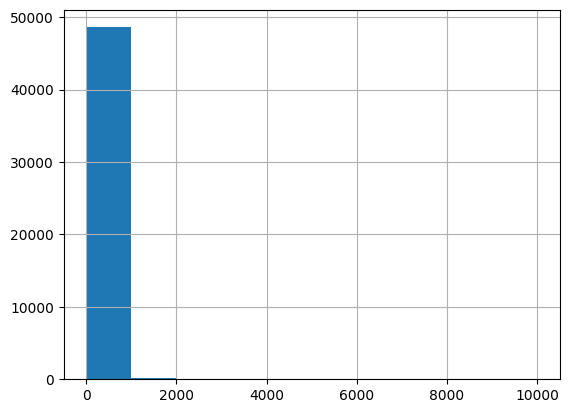

In [136]:
data_apartments['price'].hist()

O maior volume de dados se encontra em valores menores de 2000, portanto vamos ter uma melhor vizualização desses valores, vamos separar o valores altos e o valores baixos e plotar os histogramas.

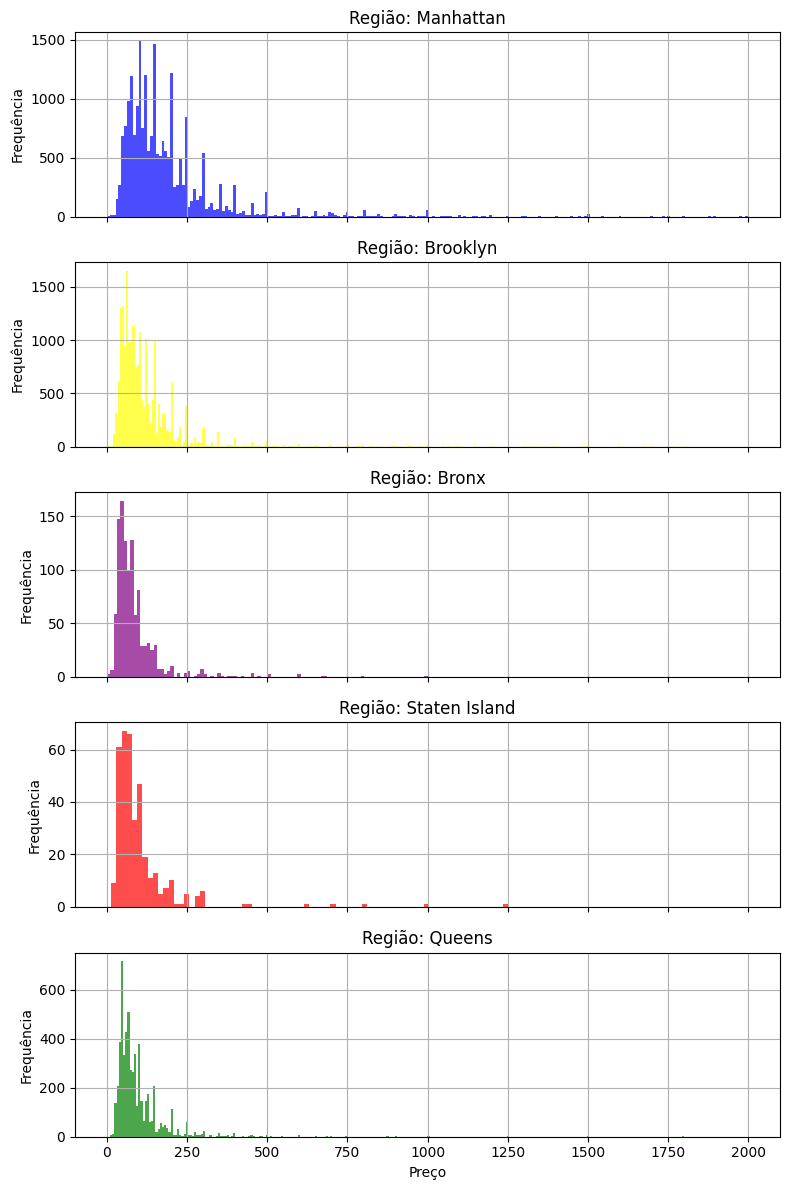

In [137]:
valor_maximo = 2000
# Filtrar dados por região
manhattan_prices = data_apartments[(data_apartments['price']< valor_maximo) & (data_apartments['bairro_group'] == 'Manhattan') ]['price']
brooklyn_prices = data_apartments[(data_apartments['price']< valor_maximo) & (data_apartments['bairro_group'] == 'Brooklyn')]['price']
bronx_prices = data_apartments[(data_apartments['price']< valor_maximo) & (data_apartments['bairro_group'] == 'Bronx')]['price']
staten_island_prices = data_apartments[(data_apartments['price']< valor_maximo) & (data_apartments['bairro_group'] == 'Staten Island')]['price']
queens_prices = data_apartments[(data_apartments['price']< valor_maximo) & (data_apartments['bairro_group'] == 'Queens')]['price']

fig, axes = plt.subplots(5, 1, figsize=(8, 12), sharex=True)


price_data = [
    (manhattan_prices, 'Manhattan', 'blue'),
    (brooklyn_prices, 'Brooklyn', 'yellow'),
    (bronx_prices, 'Bronx', 'purple'),
    (staten_island_prices, 'Staten Island', 'red'),
    (queens_prices, 'Queens', 'green')
]


for ax, (prices, region, color) in zip(axes, price_data):
    ax.hist(prices, bins='auto', color=color, alpha=0.7)
    ax.set_title(f'Região: {region}')
    ax.set_ylabel('Frequência')
    ax.grid(True)

axes[-1].set_xlabel('Preço')
fig.tight_layout()
plt.show()


Observamos a distribuição de preço por região, onde tem mais volume de dados de apartamentos. Vamos tentar deixar esses dados mais concentrados ao redor da média.

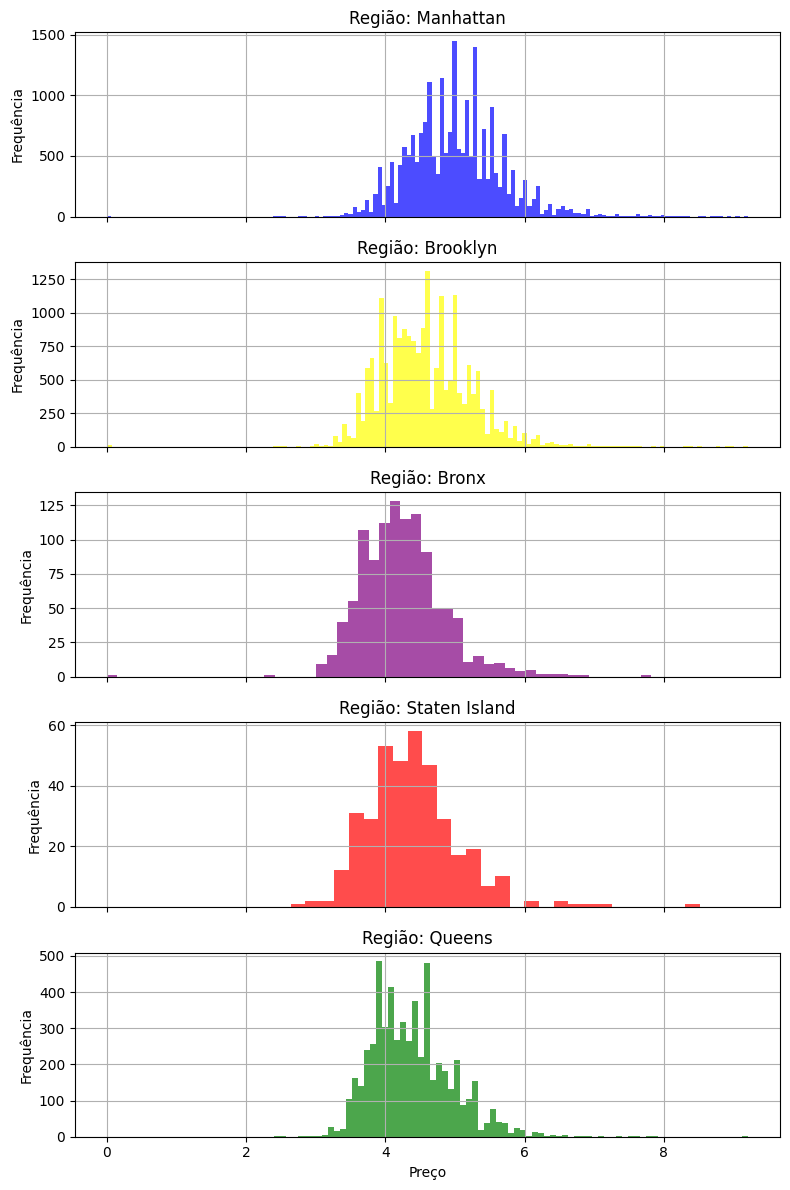

In [138]:
data_normalized = data_apartments.copy()
data_normalized['price'] = np.log(data_normalized['price']+1)


manhattan_prices_normilized = data_normalized[(data_normalized['bairro_group'] == 'Manhattan') ]['price']
brooklyn_prices_normilized = data_normalized[(data_normalized['bairro_group'] == 'Brooklyn')]['price']
bronx_prices_normilized = data_normalized[(data_normalized['bairro_group'] == 'Bronx')]['price']
staten_island_prices_normilized = data_normalized[(data_normalized['bairro_group'] == 'Staten Island')]['price']
queens_prices_normilized = data_normalized[(data_normalized['bairro_group'] == 'Queens')]['price']

fig, axes = plt.subplots(5, 1, figsize=(8, 12), sharex=True)

price_data = [
    (manhattan_prices_normilized, 'Manhattan', 'blue'),
    (brooklyn_prices_normilized, 'Brooklyn', 'yellow'),
    (bronx_prices_normilized, 'Bronx', 'purple'),
    (staten_island_prices_normilized, 'Staten Island', 'red'),
    (queens_prices_normilized, 'Queens', 'green')
]


for ax, (prices, region, color) in zip(axes, price_data):
    ax.hist(prices, bins='auto', color=color, alpha=0.7)
    ax.set_title(f'Região: {region}')
    ax.set_ylabel('Frequência')
    ax.grid(True)

axes[-1].set_xlabel('Preço')
fig.tight_layout()
plt.show()


<Axes: xlabel='latitude', ylabel='longitude'>

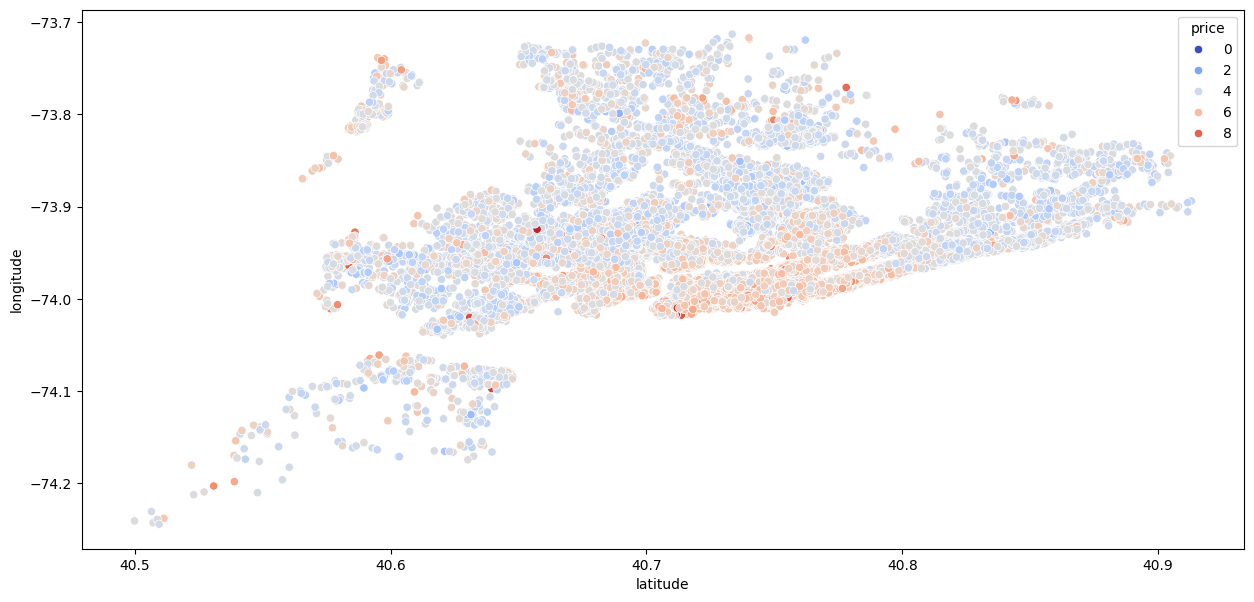

In [139]:
plt.figure(figsize=(15,7))

sns.scatterplot(x='latitude',y='longitude',data=data_normalized, hue='price', palette='coolwarm')


### - Exitem regiões mais caras devido a certas áreas específicas
Com esses gráficos podemos dizer que a a afirmação tem relevância, Manhattan detêm os imóveis com mais alto custo, seguindo de Brooklyn, que tem a maior oferta dentre trodos, seguido do Queens, Bronx e Staten Islands.

<Axes: xlabel='latitude', ylabel='longitude'>

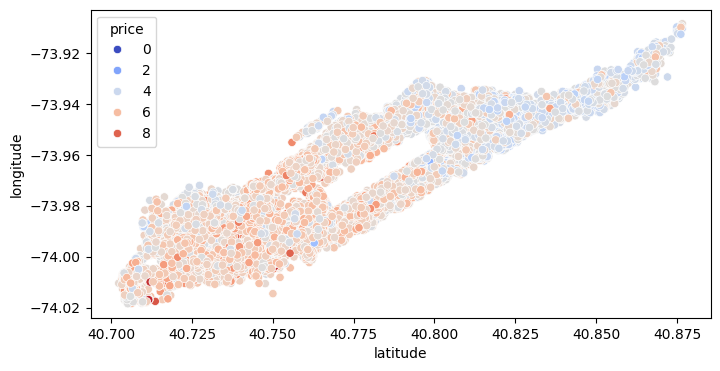

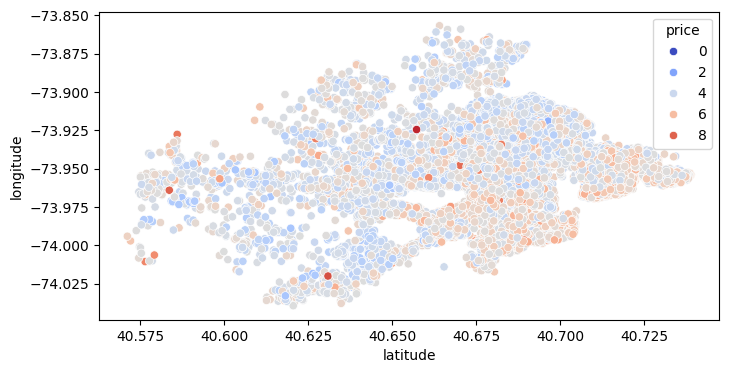

In [140]:
plt.figure(figsize=(8,4))
dataNormalizedManhattan = data_apartments[data_apartments['bairro_group'] == 'Manhattan'][['price','latitude','longitude']]
dataNormalizedManhattan['price'] = np.log(dataNormalizedManhattan['price']+1)
sns.scatterplot(x='latitude',y='longitude',data=dataNormalizedManhattan, hue='price', palette='coolwarm')

plt.figure(figsize=(8,4))
dataNormalizedBrooklyn = data_apartments[data_apartments['bairro_group'] == 'Brooklyn'][['price','latitude','longitude']]
dataNormalizedBrooklyn['price'] = np.log(dataNormalizedBrooklyn['price']+1)
sns.scatterplot(x='latitude',y='longitude',data=dataNormalizedBrooklyn, hue='price', palette='coolwarm')

In [141]:
data_apartments['bairro_group'].value_counts()

bairro_group
Manhattan        21661
Brooklyn         20103
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

<Axes: >

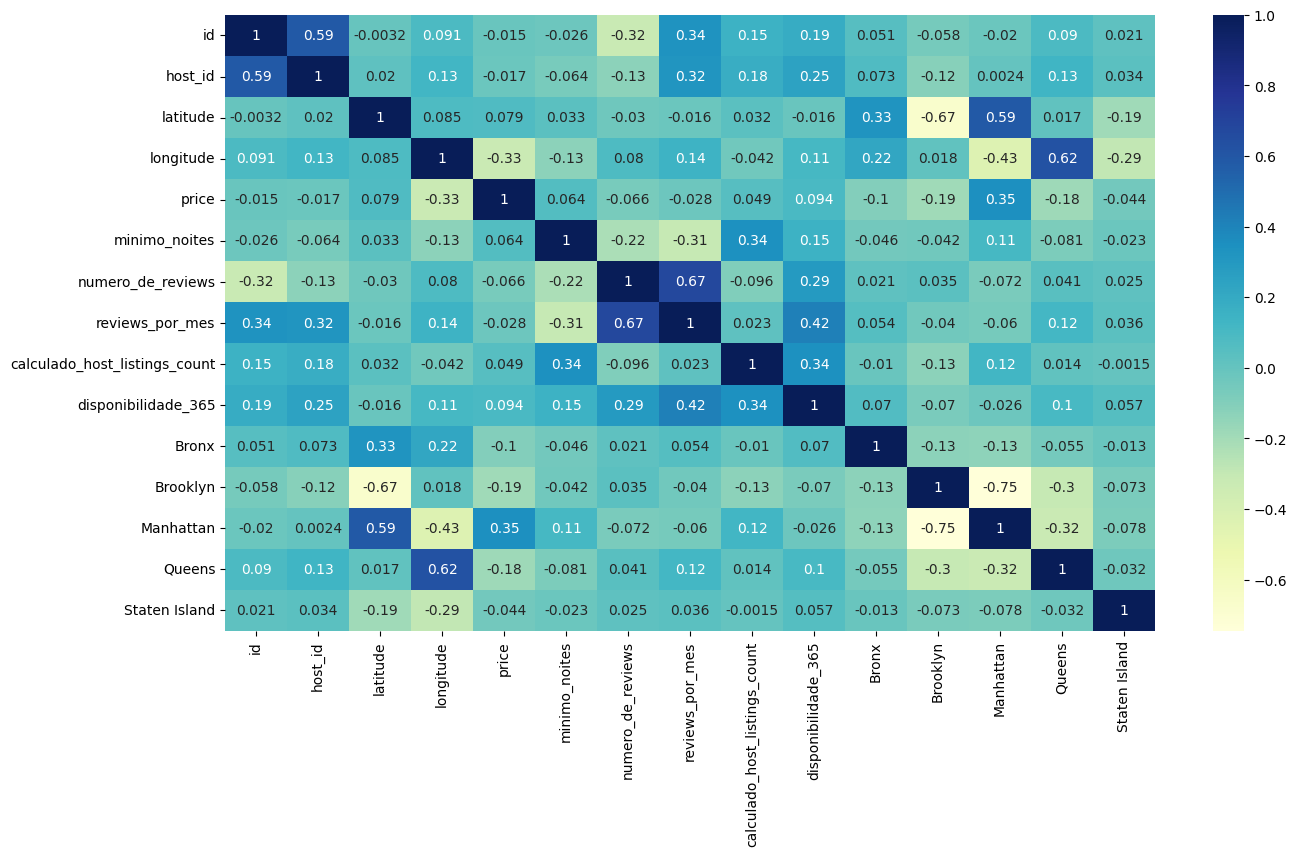

In [142]:
corr_matrix = corr_matrix.join(pd.get_dummies(data_apartments['bairro_group']))
plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix.corr(),annot=True,cmap='YlGnBu')

É possível perceber por aqui que Manhattan impacta positivamente no preço enquanto os preços nas regiões do Brooklyn, Bronx e Queens impactam negativamente no modelo.

###  Existem bairros que são mais caros que outros

In [143]:
data_apartments['bairro'].value_counts()

bairro
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Richmondtown             1
Fort Wadsworth           1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: count, Length: 221, dtype: int64

Existem muitos bairros para realizar algum agrupamento então vamos olhar a média dos bairros e verificar a correlação

<Axes: >

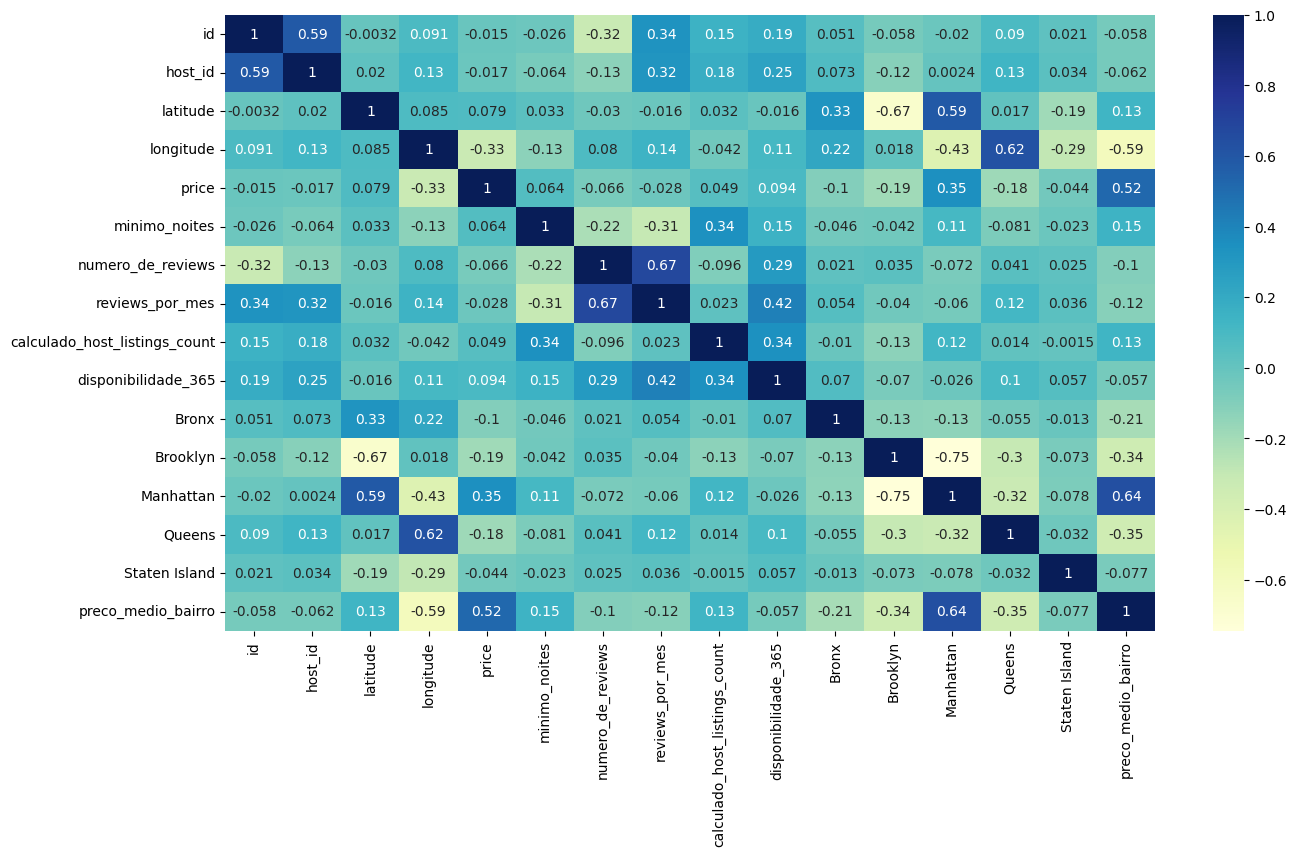

In [144]:
data = data_apartments.copy()

preco_medio_bairro = data.groupby('bairro')['price'].mean()

data['preco_medio_bairro'] = np.log(data['bairro'].map(preco_medio_bairro))+1

corr_matrix = corr_matrix.join(data['preco_medio_bairro'])
plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix.corr(),annot=True,cmap='YlGnBu')


Percebemos que existe uma correlação considerávelmente alta mediante ao bairro e seus preços médios.

In [145]:
dados_manhattan_precos_altos = data_apartments[data_apartments['bairro_group']=='Manhattan'].sort_values(by='price', ascending=False)

(dados_manhattan_precos_altos.head(15))

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
29237,22436899,1-BR Lincoln Center,72390391,Jelena,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,NaN,NaN,1,83
12341,9528920,"Quiet, Clean, Lit @ LES & Chinatown",3906464,Amy,Manhattan,Lower East Side,40.71355,-73.98507,Private room,9999,99,6,2016-01-01,0.14,1,83
6529,4737930,Spanish Harlem Apt,1235070,Olson,Manhattan,East Harlem,40.79264,-73.93898,Entire home/apt,9999,5,1,2015-01-02,0.02,1,0
40432,31340283,2br - The Heart of NYC: Manhattans Lower East ...,4382127,Matt,Manhattan,Lower East Side,40.71980,-73.98566,Entire home/apt,9999,30,0,NaN,NaN,1,365
30267,23377410,Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho,18128455,Rum,Manhattan,Tribeca,40.72197,-74.00633,Entire home/apt,8500,30,2,2018-09-18,0.18,1,251
29661,22779726,East 72nd Townhouse by (Hidden by Airbnb),156158778,Sally,Manhattan,Upper East Side,40.76824,-73.95989,Entire home/apt,7703,1,0,NaN,NaN,12,146
42522,33007610,70' Luxury MotorYacht on the Hudson,7407743,Jack,Manhattan,Battery Park City,40.71162,-74.01693,Entire home/apt,7500,1,0,NaN,NaN,1,364
44033,33998396,3000 sq ft daylight photo studio,3750764,Kevin,Manhattan,Chelsea,40.75060,-74.00388,Entire home/apt,6800,1,0,NaN,NaN,6,364
37193,29547314,Apartment New York \nHell’s Kitchens,35303743,Patricia,Manhattan,Upper West Side,40.76835,-73.98367,Private room,6500,30,0,NaN,NaN,1,97
48042,36056808,Luxury TriBeCa Apartment at an amazing price,271248669,Jenny,Manhattan,Tribeca,40.71206,-74.00999,Entire home/apt,6500,180,0,NaN,NaN,1,365


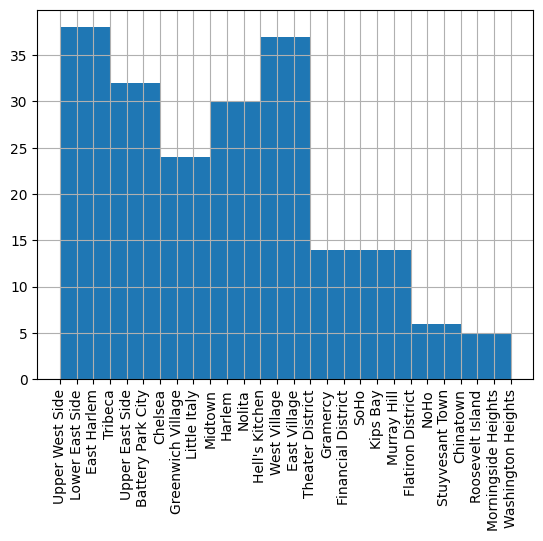

In [146]:
dados_manhattan_precos_altos['bairro'].head(200).hist(bins='auto')
plt.xticks(rotation=90) 
plt.show()

Podemos perceber que dentre as regiões mais caras, se destaca as regiões ao redor do Central Park (Upper West Side, Lower East Side, East Harlem, Theater District, Hell's Kitchen, etc...) e direcionadas ao sul da ilha de Manhattan (West Village, East Village, Tribeca, etc...)

### O tipo de apartametno que determina o espaço tem influência no preço;
O `romm_type` revela um tipo de cômodo, que revela como _entire home/apt_ que se refere ao apartamento com todos os cômodos, o _private room_ que seria apenas um cômodo privado e _shared room_ que é um cômodo compartilhado, sendo assim essa seria sua hierarquia de valores pelo espaço e privacidade.

In [147]:
apartamentos_no_harlem = data_apartments[data_apartments['bairro'] == 'Harlem']
apartamentos_no_harlem.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
29,9668,front room/double bed,32294,Ssameer Or Trip,Manhattan,Harlem,40.82245,-73.95104,Private room,50,3,242,2019-06-01,2.04,3,355
30,9704,Spacious 1 bedroom in luxe building,32045,Teri,Manhattan,Harlem,40.81305,-73.95466,Private room,52,2,88,2019-06-14,1.42,1,255
32,9783,back room/bunk beds,32294,Ssameer Or Trip,Manhattan,Harlem,40.82130,-73.95318,Private room,50,3,273,2019-07-01,2.37,3,359
43,12343,BEST BET IN HARLEM,47727,Earl,Manhattan,Harlem,40.81175,-73.94478,Entire home/apt,150,7,97,2019-06-13,0.84,1,309


- O aluguel de id = 3647 pode estar super estimado, pois embora esteja em uma localidade boa, se trata de apenas um cômodo, e até então não recebeu revisões.

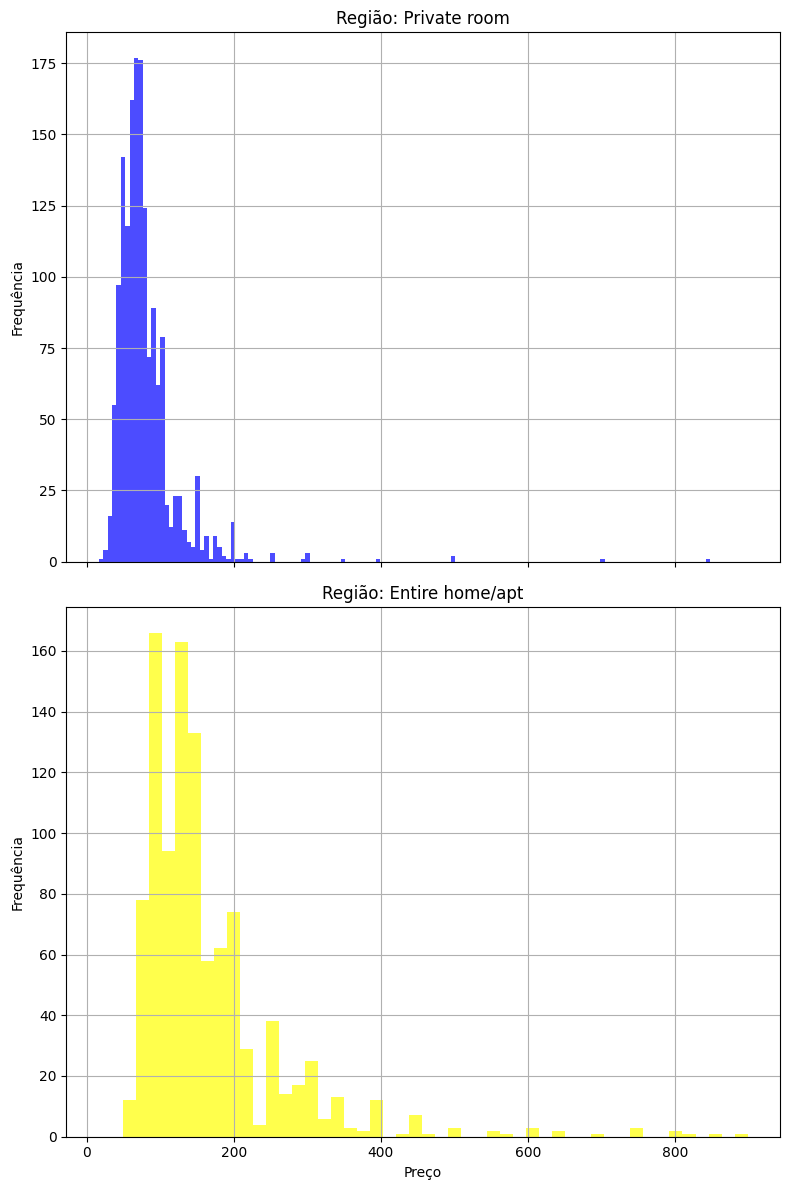

In [148]:
private_room_no_harlem = apartamentos_no_harlem[(apartamentos_no_harlem['room_type']=='Private room') & (apartamentos_no_harlem['price']<1000) ]['price']
entire_room_no_harlem = apartamentos_no_harlem[(apartamentos_no_harlem['room_type']=='Entire home/apt') & (apartamentos_no_harlem['price']<1000) ]['price']

fig, axes = plt.subplots(2, 1, figsize=(8, 12), sharex=True)
price_data = [
    (private_room_no_harlem, 'Private room', 'blue'),
    (entire_room_no_harlem, 'Entire home/apt', 'yellow'),
]

for ax, (prices, region, color) in zip(axes, price_data):
    ax.hist(prices, bins='auto', color=color, alpha=0.7)
    ax.set_title(f'Região: {region}')
    ax.set_ylabel('Frequência')
    ax.grid(True)

axes[-1].set_xlabel('Preço')
fig.tight_layout()
plt.show()

Observando o grafo podemos inferir que Entire room são mais caros. Vamos dar uma olhada na correlação

<Axes: >

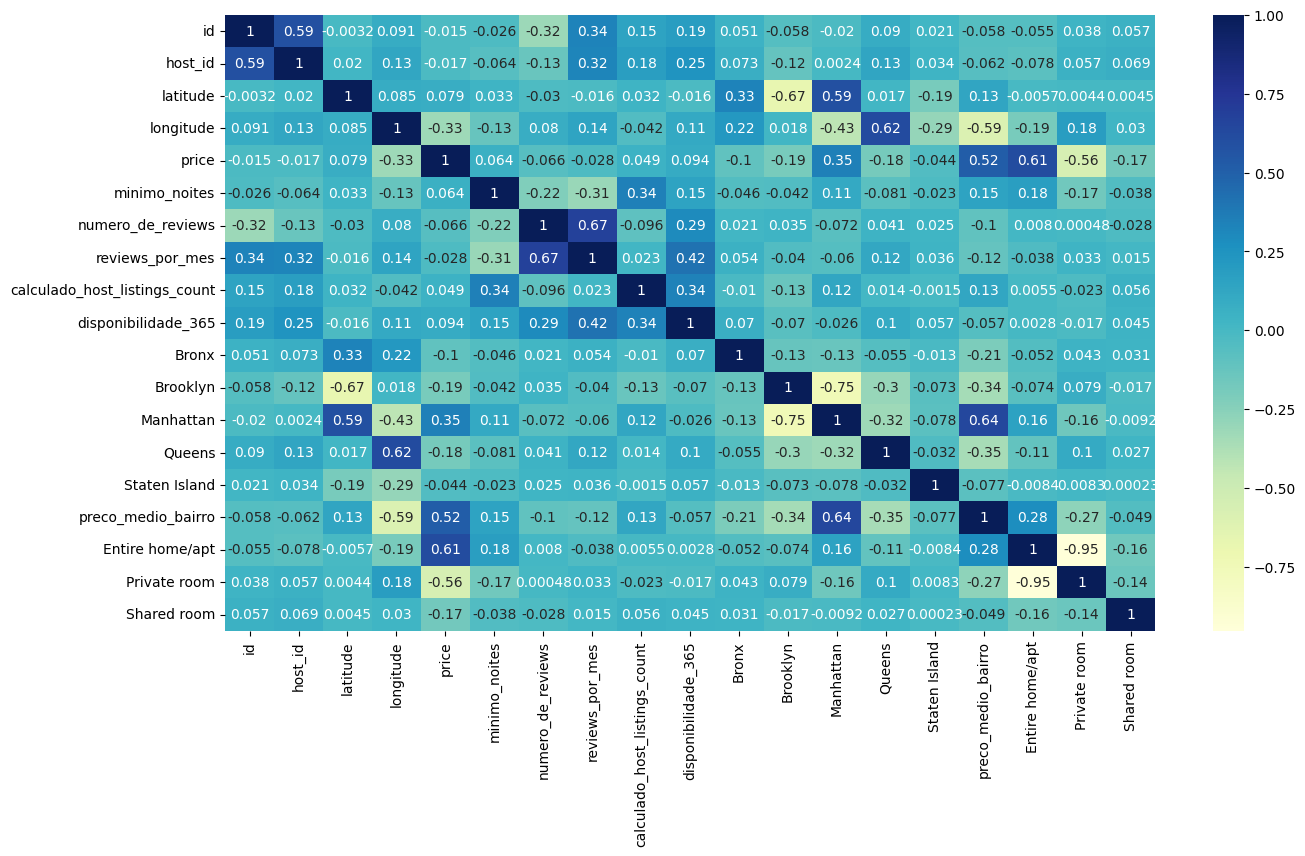

In [149]:
corr_matrix = corr_matrix.join(pd.get_dummies(data_apartments['room_type']))
plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix.corr(),annot=True,cmap='YlGnBu')

Observando que a correlação ao longo do preço é muito grande devido ao tipo de quarto.

## 2 - Perguntas

### a) Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?


Resposta: conforme foi mostrado na Analise exploratória os lugares onde mais se encontra apartamentos em aluguel são em Manhatthan, ao redor do Central Park e Sudoeste da ilha e o Leste de Brooklin, Brooklin seria mais interessante pela maior frequência de aparatamentos o que indica uma possível alta demanda. As zonas onde tem aceeso as pontes também têm muita procura. Também sempre procurar por bairros mais procurados. Uma boa ideia também é grandes apartamentos em áreas médias, mas com disponibilidade de divisão de cômodos e alugar apenas um quarto privado.

### b)O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?

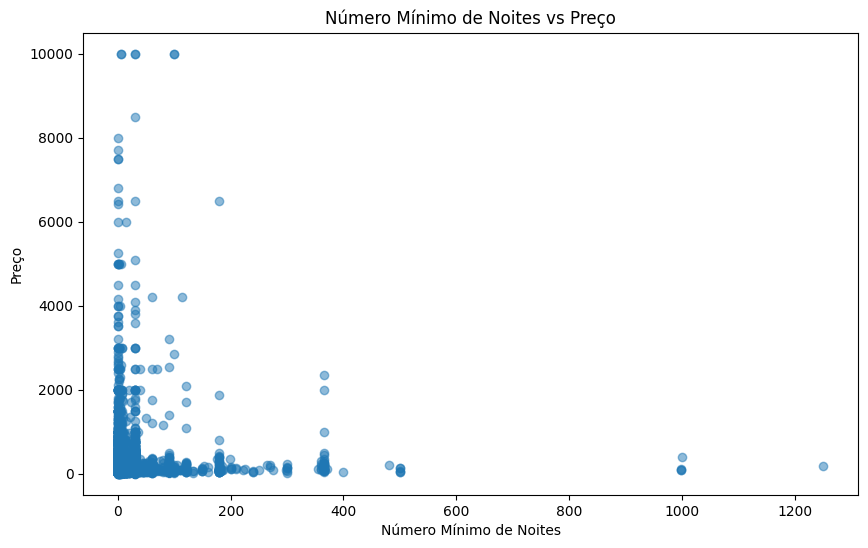

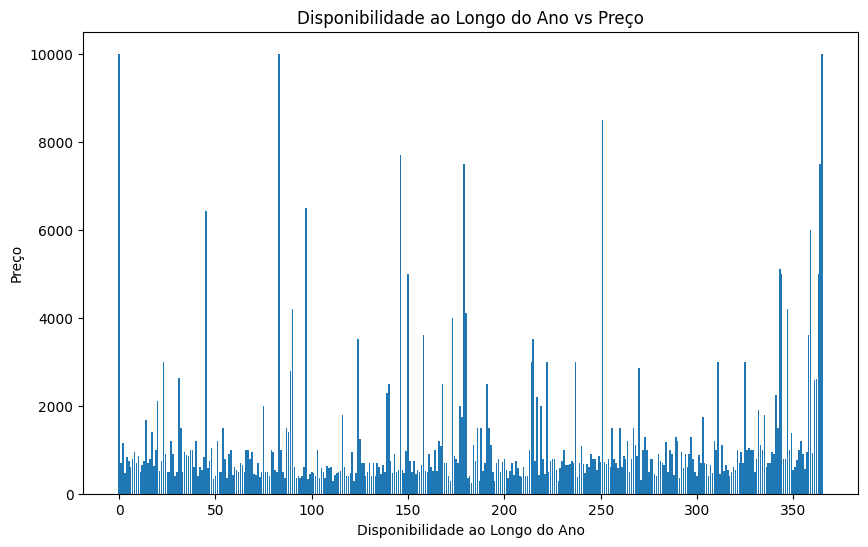

In [150]:

plt.figure(figsize=(10, 6))
plt.scatter(data_apartments['minimo_noites'], data_apartments['price'], alpha=0.5)
plt.title('Número Mínimo de Noites vs Preço')
plt.xlabel('Número Mínimo de Noites')
plt.ylabel('Preço')
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(data_apartments['disponibilidade_365'], data_apartments['price'])
plt.title('Disponibilidade ao Longo do Ano vs Preço')
plt.xlabel('Disponibilidade ao Longo do Ano')
plt.ylabel('Preço')
plt.show()

É possivel ver que o número de noites na maioria das vezes é bem pouco e maioria dos registros se encontra em poucos números o que indica uma correlação fraca.
No caso dos dias disponíves ao longo do ano, o maiores registros se encontram bem espalhados, e os maiores picos em valores trimestrais, semestrais ou anuais. Ainda sim uma baixa relação

In [151]:

dataNormalized = data_apartments[['price','minimo_noites','disponibilidade_365']]

dataNormalized['price'] = np.log(dataNormalized['price']+1)
dataNormalized['minimo_noites'] = np.log(dataNormalized['minimo_noites']+1)
dataNormalized['disponibilidade_365'] = np.log(dataNormalized['disponibilidade_365']+1)


correlacao_minimo_noites_preco = dataNormalized['minimo_noites'].corr(dataNormalized['price'])
correlacao_disponibilidade_preco = dataNormalized['disponibilidade_365'].corr(dataNormalized['price'])

print(f'Correlação entre número mínimo de noites e preço: {correlacao_minimo_noites_preco}')
print(f'Correlação entre disponibilidade ao longo do ano e preço: {correlacao_disponibilidade_preco}')

Correlação entre número mínimo de noites e preço: 0.06358560765903377
Correlação entre disponibilidade ao longo do ano e preço: 0.09398828358573852


/tmp/ipykernel_1883/2432609451.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataNormalized['price'] = np.log(dataNormalized['price']+1)
/tmp/ipykernel_1883/2432609451.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataNormalized['minimo_noites'] = np.log(dataNormalized['minimo_noites']+1)
/tmp/ipykernel_1883/2432609451.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

Demostra uma corelação muito pequena para ambas as variáveis na primeira amostra. Entretanto na segunda amostra conseguimos observaar uma relação não linear onde os limites detêm maiores preços

### c)Existe algum padrão no texto do nome do local para lugares de mais alto valor?

In [152]:
top_10_percent = data_apartments[data_apartments['price'] > data_apartments['price'].quantile(0.90)]
most_popular_names_top_10 = top_10_percent['nome']
most_frequentily_words = data_apartments['nome']

print(most_popular_names_top_10.head(20))

most_popular_names_top_10 = map(str, most_popular_names_top_10)
most_frequentily_words = map(str, most_frequentily_words)



19                      Sweet and Spacious Brooklyn Loft
60                    Sunny & Spacious Chelsea Apartment
67     *HAVEN LOFT - Entire Floor - Six Windows - Bri...
81                      Entire 2 Bedroom - Large & Sunny
84                   perfect for a family or small group
102    2000 SF 3br 2bath West Village private  townhouse
113    2 BR / 2 Bath Duplex Apt with patio! East Village
115                  2 story family home in Williamsburg
120                     3 Story Town House in Park Slope
157                     Luxury Brownstone in Boerum Hill
180                   Beautiful Queens Brownstone! - 5BR
189                 LUX APT IN TIMES SQUARE NEW BUILDING
190    Designer 1 BR Duplex w/ Terrace- Spectacular V...
222                         Stylish Large Gramercy Loft!
232                   Beautiful, elegant 3 bed SOHO loft
241                                    Huge Chelsea Loft
253                          Beautiful Landmarked Duplex
262                            

Um meio interessante de descobrimos palavras que se repetem é usar uma núvem de palavras, dessa forma a vizualização das palavras mais repetidas estaram aqui, entretando a amostra não deve ser tão grande, pq so teremos uma noção da quantidade e não das palavras com mais valor.

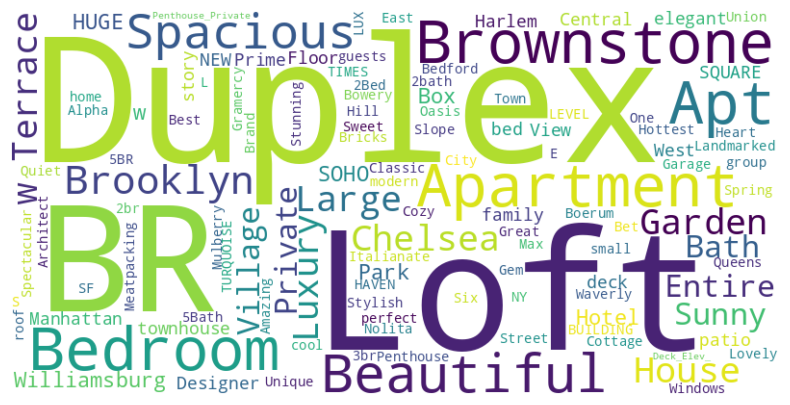

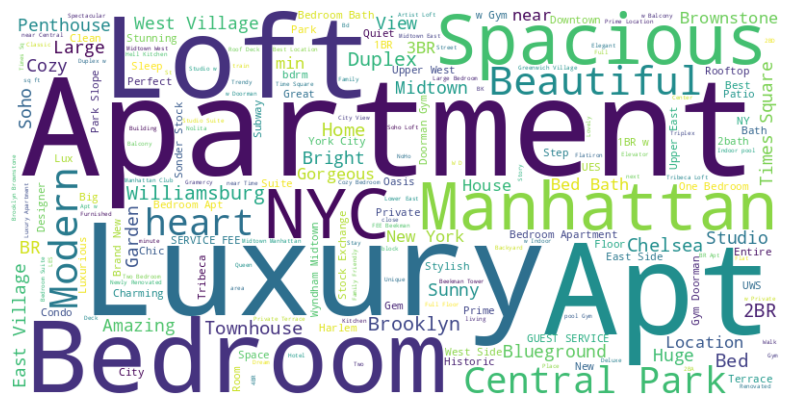

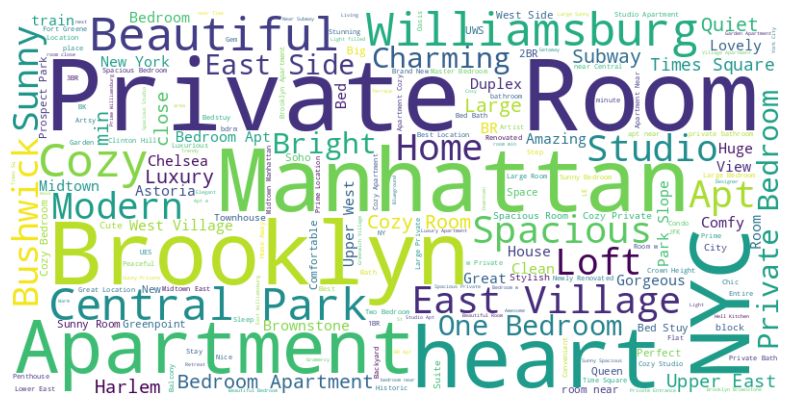

In [153]:
from wordcloud import WordCloud


top_names = top_10_percent.head(50)['nome']

wordcloudPopularHighTopNames = WordCloud(width=800, height=400, background_color='white').generate(' '.join(top_names))
wordcloudTopPopularNames = WordCloud(width=800, height=400, background_color='white').generate(' '.join(most_popular_names_top_10))
wordcloudCommonNames = WordCloud(width=800, height=400, background_color='white').generate(' '.join(most_frequentily_words))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloudPopularHighTopNames, interpolation='bilinear')
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(wordcloudTopPopularNames, interpolation='bilinear')
plt.axis('off')
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(wordcloudCommonNames, interpolation='bilinear')
plt.axis('off')
plt.show()



### O nome contém uma característica do apartamento que tem influência no preço;

Podemos perceber que palavras que se referem ao espaço permancem na procura, o que é óbvio, pois quanto mais espaço, mais caro, e palavras como _large_,_spacaious_,_duplex_ devem se destacar _beautyfull_ e _luxury_ para indicar luxo, e _loft_ se referindo a coberturas.

Também é notável perceber que Apartamentos são bem procurados, pelas palavras _apt_ _apartement_. Uma ótima estatégia para o investidor é olhar as palavras mais repetidas em anuncios, pois não indicam maior preço mas indicam a maior oferta.